<a href="https://colab.research.google.com/github/anidaniel/BreastCancerDS/blob/master/brCancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#Description: This program detects breast cancer, based off of data. Breast Cancer (BC)
#Developer : Aniruddha Prasad (github.com/anidaniel)

In [0]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
'''#loading the dataset
from google.colab import files 
uploaded = files.upload()
df = pd.read_csv('C:\\Users\\Anidaniel\\Downloads\\brcancerdata.csv')
df.head()'''

"#loading the dataset\nfrom google.colab import files \nuploaded = files.upload()\ndf = pd.read_csv('C:\\Users\\Anidaniel\\Downloads\\brcancerdata.csv')\ndf.head()"

In [0]:
'''#loading dataset from google drive
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)'''

In [0]:
#loading dataset from google drive
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!ls '/content/drive/My Drive/Datasets'
#!cd '/content/drive/My Drive/Datasets'

brcancerdata.csv


In [0]:
#loading the data on the pandas dataframe
df = pd.read_csv('/content/drive/My Drive/Datasets/brcancerdata.csv')
df.head(10)

id diagnosis  ...  fractal_dimension_worst  Unnamed: 32
0    842302         M  ...                  0.11890          NaN
1    842517         M  ...                  0.08902          NaN
2  84300903         M  ...                  0.08758          NaN
3  84348301         M  ...                  0.17300          NaN
4  84358402         M  ...                  0.07678          NaN
5    843786         M  ...                  0.12440          NaN
6    844359         M  ...                  0.08368          NaN
7  84458202         M  ...                  0.11510          NaN
8    844981         M  ...                  0.10720          NaN
9  84501001         M  ...                  0.20750          NaN

[10 rows x 33 columns]

In [0]:
#Count the number of rows and columns in the data set
df.shape

(569, 33)

In [0]:
#Count the empty (NaN, NAN, na) values in each column
df.isna().sum()

#Drop the column with all missing values (na, NAN, NaN)
#NOTE: This drops the column Unnamed
df = df.dropna(axis=1)

#dropping id column as it'll make irrelevant relation with other features
df = df.drop("id", axis=1)

In [0]:
#Count the number of rows and columns in the data set
df.shape

(569, 31)

In [0]:
df.head(10)

diagnosis  radius_mean  ...  symmetry_worst  fractal_dimension_worst
0         M        17.99  ...          0.4601                  0.11890
1         M        20.57  ...          0.2750                  0.08902
2         M        19.69  ...          0.3613                  0.08758
3         M        11.42  ...          0.6638                  0.17300
4         M        20.29  ...          0.2364                  0.07678
5         M        12.45  ...          0.3985                  0.12440
6         M        18.25  ...          0.3063                  0.08368
7         M        13.71  ...          0.3196                  0.11510
8         M        13.00  ...          0.4378                  0.10720
9         M        12.46  ...          0.4366                  0.20750

[10 rows x 31 columns]

In [0]:
#Get a count of the number of Malignant (M) (harmful) or Benign (B) cells (not harmful)
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

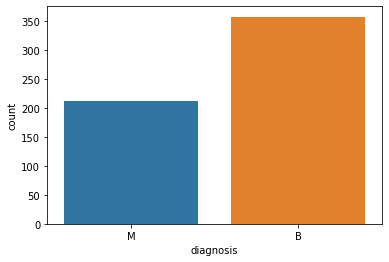

In [0]:
#Visualize this count
sns.countplot(df['diagnosis'],label="Count")

In [0]:
#Look at the data types to see which columns need to be transformed / encoded to a number
df.dtypes

diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst

In [0]:
#Transform/ Encode the column diagnosis
#dictionary = {'M':1, 'B':0}#Create a dictionary file
#df.diagnosis = [dictionary[item] for item in df.diagnosis] #Change all 'M' to 1 and all 'B' to 0 in the diagnosis col

#Encoding categorical data values (Transforming categorical data/ Strings to integers)
from sklearn.preprocessing import LabelEncoder

labelencoder_Y = LabelEncoder()
df.iloc[:,0]= labelencoder_Y.fit_transform(df.iloc[:,0].values)
print(labelencoder_Y.fit_transform(df.iloc[:,0].values))

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 0 1 0 0 0 0 0 1 1 0 1 1 0 0 0 0 1 0 1 1 0 0 0 0 1 0 1 1
 0 1 0 1 1 0 0 0 1 1 0 1 1 1 0 0 0 1 0 0 1 1 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0
 0 0 0 0 0 0 1 1 1 0 1 1 0 0 0 1 1 0 1 0 1 1 0 1 1 0 0 1 0 0 1 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 1 1 1 0 1
 0 1 0 0 0 1 0 0 1 1 0 1 1 1 1 0 1 1 1 0 1 0 1 0 0 1 0 1 1 1 1 0 0 1 1 0 0
 0 1 0 0 0 0 0 1 1 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0
 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1
 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 1 0 0
 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 1 0 1 0 0 1 

/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


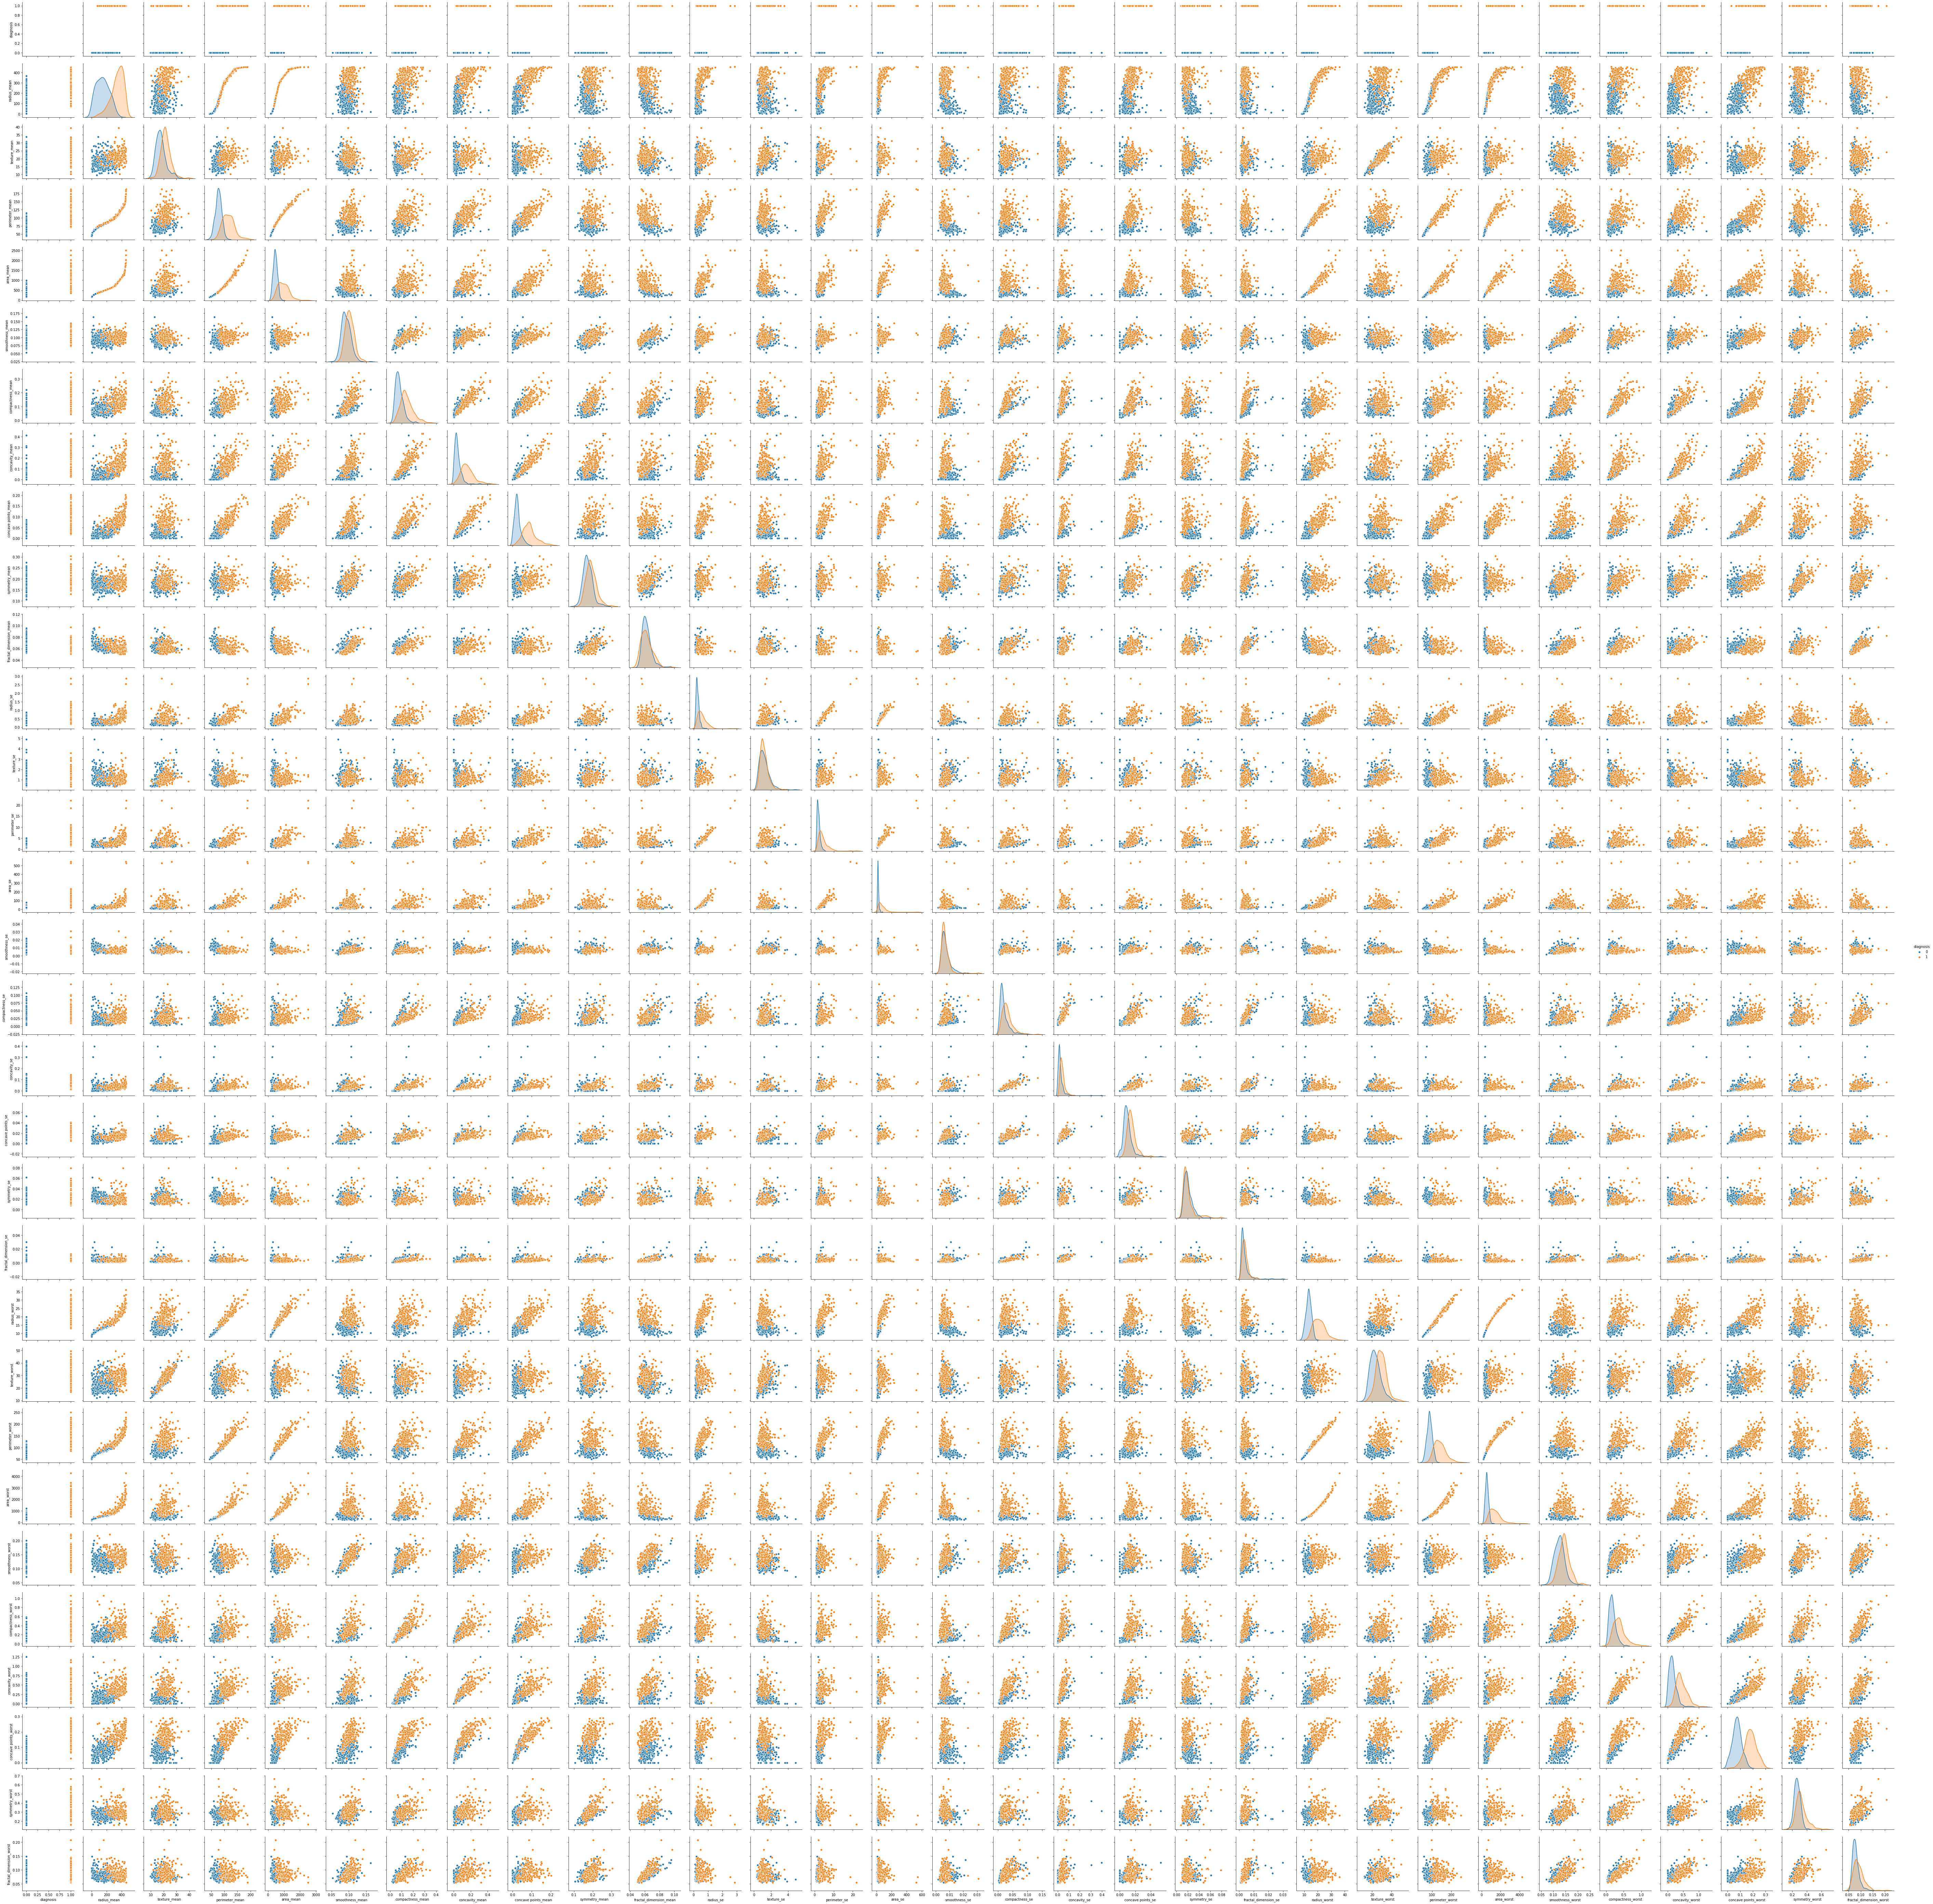

In [0]:
#A “pairs plot” is also known as a scatterplot, in which one variable in the same data row is matched with another variable's value
sns.pairplot(df, hue="diagnosis")
#sns.pairplot(df.iloc[:,1:6], hue="diagnosis") #plot a sample of the columns 

/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


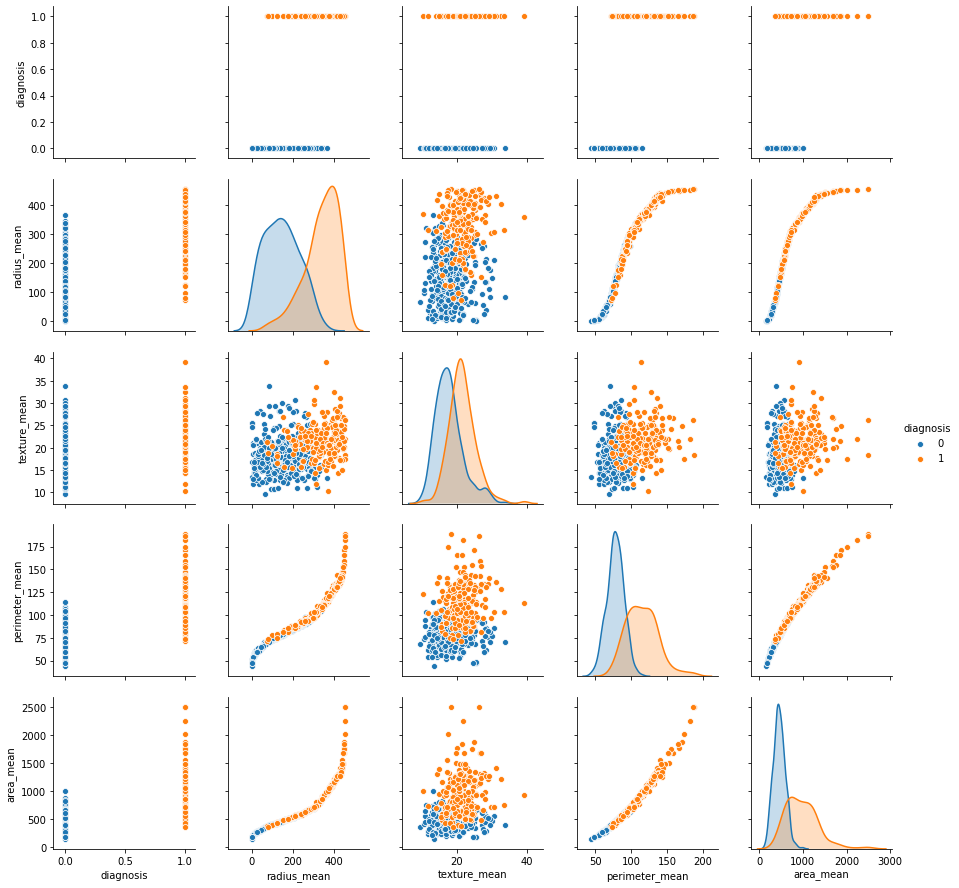

In [0]:
sns.pairplot(df.iloc[:,0:5], hue="diagnosis")

In [0]:
#Print the first 5 rows of the new data set
df.head(5)

diagnosis  radius_mean  ...  symmetry_worst  fractal_dimension_worst
0          1          370  ...          0.4601                  0.11890
1          1          426  ...          0.2750                  0.08902
2          1          406  ...          0.3613                  0.08758
3          1           98  ...          0.6638                  0.17300
4          1          418  ...          0.2364                  0.07678

[5 rows x 31 columns]

In [0]:
#Get the correlation of the columns
df.corr()
#df.iloc[:,1:12].corr() #Get a sample of correlated column info

diagnosis  ...  fractal_dimension_worst
diagnosis                 1.000000  ...                 0.323872
radius_mean               0.742827  ...                 0.019030
texture_mean              0.415185  ...                 0.119205
perimeter_mean            0.742636  ...                 0.051019
area_mean                 0.708984  ...                 0.003738
smoothness_mean           0.358560  ...                 0.499316
compactness_mean          0.596534  ...                 0.687382
concavity_mean            0.696360  ...                 0.514930
concave points_mean       0.776614  ...                 0.368661
symmetry_mean             0.330499  ...                 0.438413
fractal_dimension_mean   -0.012838  ...                 0.767297
radius_se                 0.567134  ...                 0.049559
texture_se               -0.008303  ...                -0.045655
perimeter_se              0.556141  ...                 0.085433
area_se                   0.548236  ...                 0.017539
smoothness_se            -0.067016  ...                 0.101480
compactness_se            0.292999  ...                 0.590973
concavity_se              0.253730  ...                 0.439329
concave points_se         0.408042  ...                 0.310655
symmetry_se              -0.006522  ...                 0.078079
fractal_dimension_se      0.077972  ...                 0.591328
radius_worst              0.776454  ...                 0.093492
texture_worst             0.456903  ...                 0.219122
perimeter_worst           0.782914  ...                 0.138957
area_worst                0.733825  ...                 0.079647
smoothness_worst          0.421465  ...                 0.617624
compactness_worst         0.590998  ...                 0.810455
concavity_worst           0.659610  ...                 0.686511
concave points_worst      0.793566  ...                 0.511114
symmetry_worst            0.416294  ...                 0.537848
fractal_dimension_worst   0.323872  ...                 1.000000

[31 rows x 31 columns]

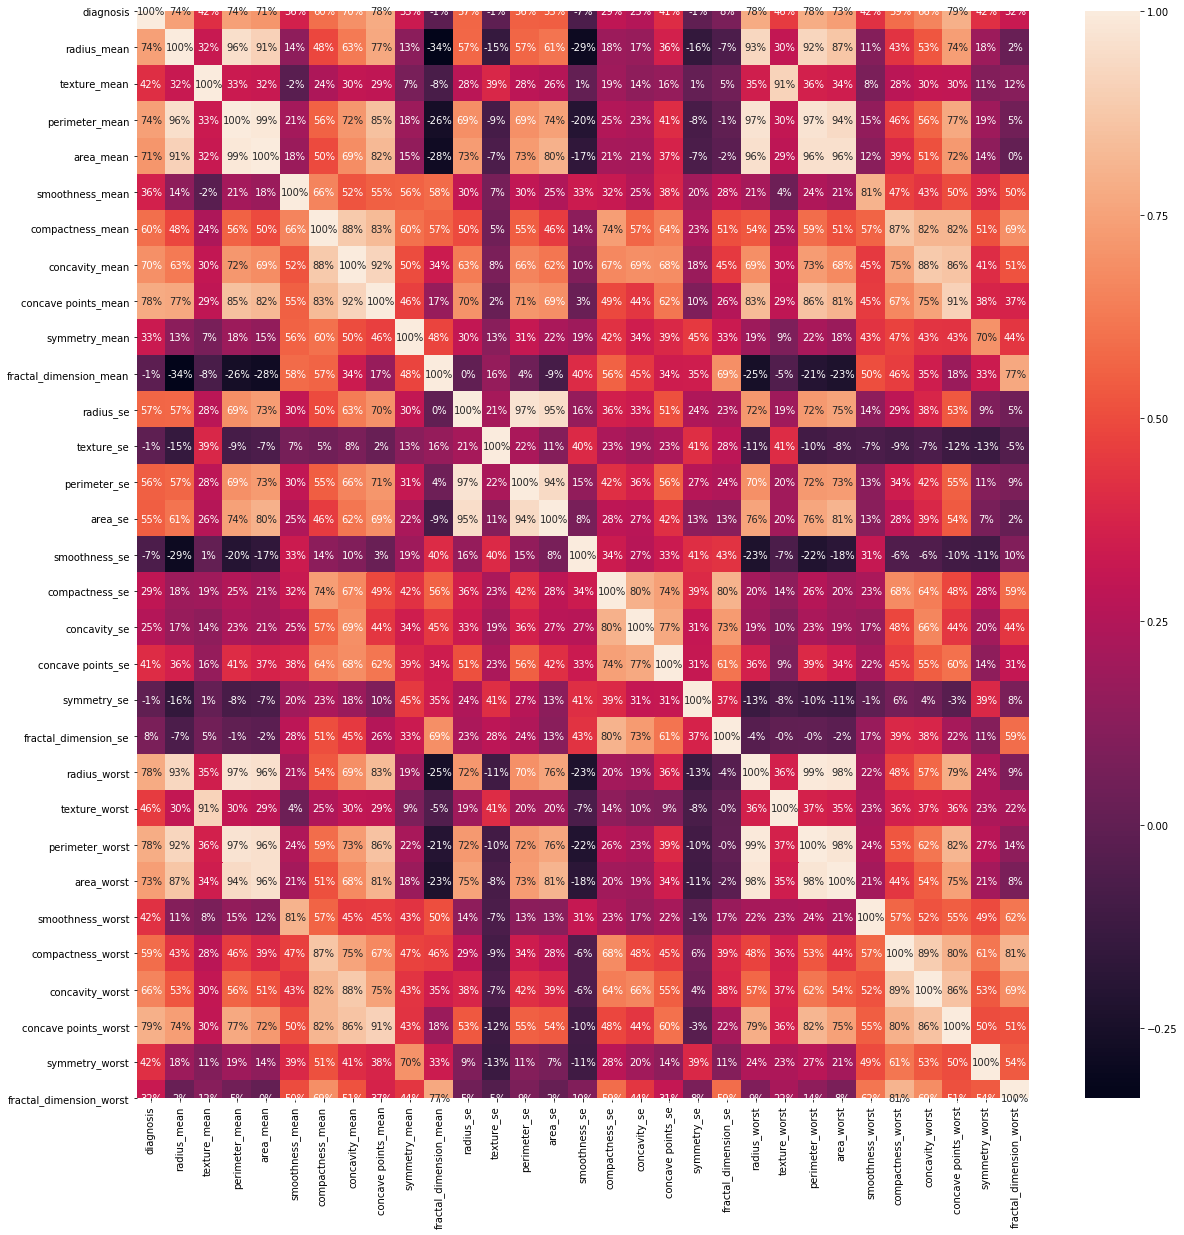

In [0]:
#Visualize the correlation 
#NOTE: To see the numbers within the cell ==>  sns.heatmap(df.corr(), annot=True)
plt.figure(figsize=(20,20))  #This is used to change the size of the figure/ heatmap
sns.heatmap(df.corr(), annot=True, fmt='.0%')
#plt.figure(figsize=(10,10)) 
#sns.heatmap(df.iloc[:,1:12].corr(), annot=True, fmt='.0%') #meant for specific feature selected

In [0]:
#Writing the main component of the prediction model starts here : 
#Split the data into independent 'X' and dependent 'Y' variables
X = df.iloc[:, 1:30].values #Notice I started from index  2 to 31, essentially removing the id column & diagnosis
Y = df.iloc[:, 0].values #Get the target variable 'diagnosis' located at index=1

In [0]:
# Split the dataset into 75% Training set and 25% Testing set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

In [0]:
# Scale the data to bring all features to the same level of magnitude
# This means the data will be within a specific range for example 0 -100 or 0 - 1

#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [0]:
#Create a function within many Machine Learning Models
def models(X_train,Y_train):
  
  #Using Logistic Regression Algorithm to the Training Set
  from sklearn.linear_model import LogisticRegression
  log = LogisticRegression(random_state = 0)
  log.fit(X_train, Y_train)
  
  #Using KNeighborsClassifier Method of neighbors class to use Nearest Neighbor algorithm
  from sklearn.neighbors import KNeighborsClassifier
  knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
  knn.fit(X_train, Y_train)

  #Using SVC method of svm class to use Support Vector Machine Algorithm
  from sklearn.svm import SVC
  svc_lin = SVC(kernel = 'linear', random_state = 0)
  svc_lin.fit(X_train, Y_train)

  #Using SVC method of svm class to use Kernel SVM Algorithm
  from sklearn.svm import SVC
  svc_rbf = SVC(kernel = 'rbf', random_state = 0)
  svc_rbf.fit(X_train, Y_train)

  #Using GaussianNB method of naïve_bayes class to use Naïve Bayes Algorithm
  from sklearn.naive_bayes import GaussianNB
  gauss = GaussianNB()
  gauss.fit(X_train, Y_train)

  #Using DecisionTreeClassifier of tree class to use Decision Tree Algorithm
  from sklearn.tree import DecisionTreeClassifier
  tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
  tree.fit(X_train, Y_train)

  #Using RandomForestClassifier method of ensemble class to use Random Forest Classification algorithm
  from sklearn.ensemble import RandomForestClassifier
  forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
  forest.fit(X_train, Y_train)
  
  #print model accuracy on the training data.
  print('[0]Logistic Regression Training Accuracy:', log.score(X_train, Y_train))
  print('[1]K Nearest Neighbor Training Accuracy:', knn.score(X_train, Y_train))
  print('[2]Support Vector Machine (Linear Classifier) Training Accuracy:', svc_lin.score(X_train, Y_train))
  print('[3]Support Vector Machine (RBF Classifier) Training Accuracy:', svc_rbf.score(X_train, Y_train))
  print('[4]Gaussian Naive Bayes Training Accuracy:', gauss.score(X_train, Y_train))
  print('[5]Decision Tree Classifier Training Accuracy:', tree.score(X_train, Y_train))
  print('[6]Random Forest Classifier Training Accuracy:', forest.score(X_train, Y_train))
  
  return log, knn, svc_lin, svc_rbf, gauss, tree, forest

In [0]:
model = models(X_train,Y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[0]Logistic Regression Training Accuracy: 0.9906103286384976
[1]K Nearest Neighbor Training Accuracy: 0.9765258215962441
[2]Support Vector Machine (Linear Classifier) Training Accuracy: 0.9882629107981221
[3]Support Vector Machine (RBF Classifier) Training Accuracy: 0.9835680751173709
[4]Gaussian Naive Bayes Training Accuracy: 0.9483568075117371
[5]Decision Tree Classifier Training Accuracy: 1.0
[6]Random Forest Classifier Training Accuracy: 0.9953051643192489


In [0]:
#Classification accuracy is the ratio of correct predictions to total predictions made.
from sklearn.metrics import confusion_matrix
for i in range(len(model)):
  cm = confusion_matrix(Y_test, model[i].predict(X_test))
  
  TN = cm[0][0]
  TP = cm[1][1]
  FN = cm[1][0]
  FP = cm[0][1]
  
  print(cm)
  print('Model[{}] Testing Accuracy = "{}!"'.format(i,  (TP + TN) / (TP + TN + FN + FP)))
  print()# Print a new line

[[86  4]
 [ 4 49]]
Model[0] Testing Accuracy = "0.9440559440559441!"

[[89  1]
 [ 6 47]]
Model[1] Testing Accuracy = "0.951048951048951!"

[[87  3]
 [ 2 51]]
Model[2] Testing Accuracy = "0.965034965034965!"

[[88  2]
 [ 3 50]]
Model[3] Testing Accuracy = "0.965034965034965!"

[[86  4]
 [ 6 47]]
Model[4] Testing Accuracy = "0.9300699300699301!"

[[84  6]
 [ 1 52]]
Model[5] Testing Accuracy = "0.951048951048951!"

[[87  3]
 [ 2 51]]
Model[6] Testing Accuracy = "0.965034965034965!"



In [0]:
#Show other ways to get the classification accuracy & other metrics 

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

for i in range(len(model)):
  print('Model ',i)
  #Check precision, recall, f1-score
  print( classification_report(Y_test, model[i].predict(X_test)) )
  #Another way to get the models accuracy on the test data
  print( accuracy_score(Y_test, model[i].predict(X_test)))
  print()#Print a new line

Model  0
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        90
           1       0.92      0.92      0.92        53

    accuracy                           0.94       143
   macro avg       0.94      0.94      0.94       143
weighted avg       0.94      0.94      0.94       143

0.9440559440559441

Model  1
              precision    recall  f1-score   support

           0       0.94      0.99      0.96        90
           1       0.98      0.89      0.93        53

    accuracy                           0.95       143
   macro avg       0.96      0.94      0.95       143
weighted avg       0.95      0.95      0.95       143

0.951048951048951

Model  2
              precision    recall  f1-score   support

           0       0.98      0.97      0.97        90
           1       0.94      0.96      0.95        53

    accuracy                           0.97       143
   macro avg       0.96      0.96      0.96       143
weighted

In [0]:
#Print Prediction of Random Forest Classifier model
pred = model[6].predict(X_test)
print(pred)

#Print a space
print()

#Print the actual values
print(Y_test)

[1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 1 1 1 1 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 1 1 0 0 1 0 0
 1 0 0 0 0 0 1 1 1 0 1 0 0 0 1 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 1 0
 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 1]

[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 1 1 0 0 1 0 1
 1 0 0 0 0 0 1 1 1 0 1 0 0 0 1 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 1 0
 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 1]
